In [21]:
def plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints=None):
    ax = plt.imshow(landscape)
    if scatterpoints is None:
        scatterpoints = []
    for scatterpoint in scatterpoints:
        plt.scatter(scatterpoint[0][1], scatterpoint[0][0], c=scatterpoint[1], s=100, marker='*', label=scatterpoint[2])
    plt.legend()
    ax.figure.canvas.draw()

    subplot = ax.figure.get_axes()[0]

    ticks = subplot.get_xticklabels()
    scale = 1/max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_gamma - min_gamma
    for tick in ticks:
        if tick.get_text() != '':
            tick.set_text(round(scale * float(tick.get_text().replace('−', '-')) - max_gamma, 2))
        subplot.set_xticklabels(ticks)

    ticks = subplot.get_yticklabels()
    scale = 1 / max([float(tick.get_text().replace('−', '-')) for tick in ticks if tick.get_text() != ''])
    scale *= max_beta - min_beta
    for tick in ticks:
        if tick.get_text() != '':
            tick.set_text(-1 * round(scale * float(tick.get_text().replace('−', '-')) - max_beta, 2))
        subplot.set_yticklabels(ticks)

    plt.ylabel(r"$\beta$")
    plt.xlabel(r"$\gamma$")

445f0df1855dbcc2a0b5712bc7bebd4d.pkl
283f511e60c4cae3b50ab649dbe1ffe3.pkl
a8f0f08ed4c82e7b1e0406437d6c7874.pkl
b899f7ba525130c20ac9bd7d834b870a.pkl
86d083816d6af02bdb16442fcdacf5cf.pkl
144791a6e0350fef1f936a0f03c4b26e.pkl
dbdfce81c645c9b4635f31548144fc82.pkl
63849320b96a66270317d9f219f6a1b0.pkl
b0e82c0e2770ef7779f232e7d95efa97.pkl
933e9f92d158c27c342f2bddf8da260f.pkl
NUMQUBITS: 8


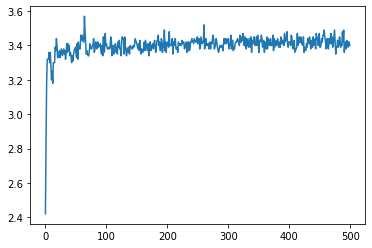

0.7019956068149806 -0.41727601110081497


<ipython-input-21-7f1aca767258>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(ticks)
<ipython-input-21-7f1aca767258>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_yticklabels(ticks)


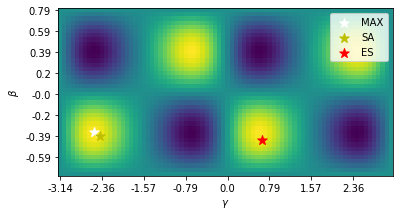

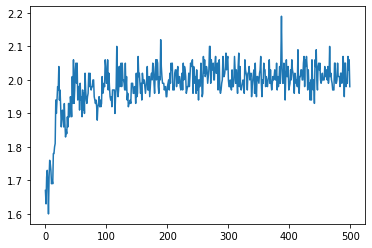

0.5352234508962659 -0.4277998810727294


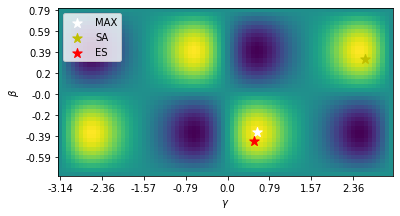

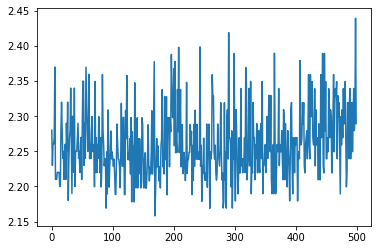

0.6202420770557844 -0.9009068788886536


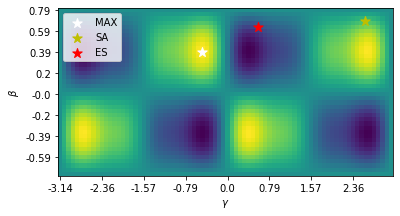

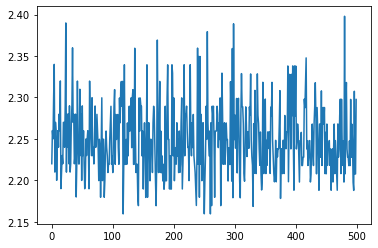

-1.9493266094860742 1.0235600005614651


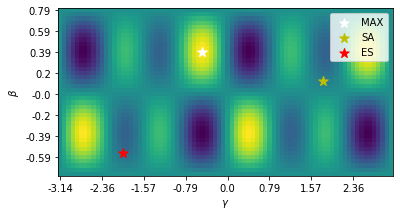

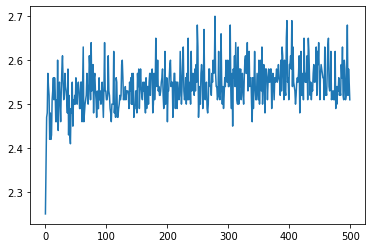

0.5620212960991522 -0.5023524689357897


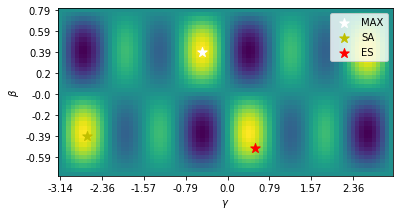

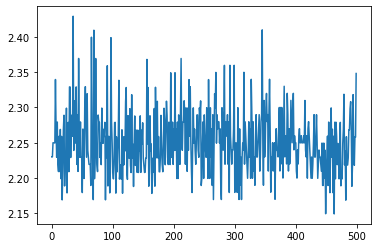

1.6779687648691324 1.0110316010061613


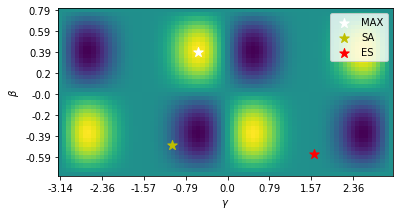

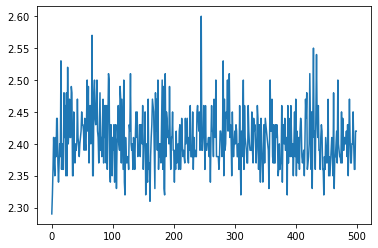

0.3699141782180777 -0.41898304570238554


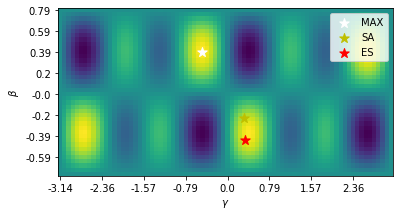

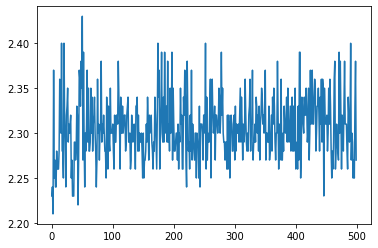

-0.16104122305623825 0.405920489851668


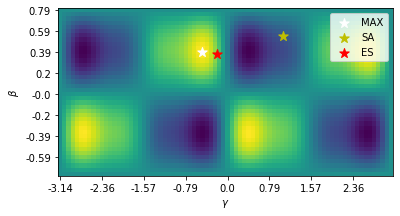

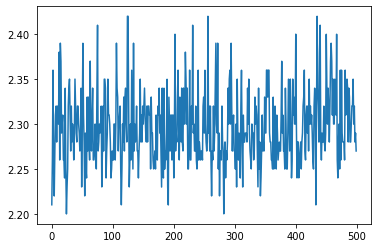

-0.3920065422566928 0.30006082246916904


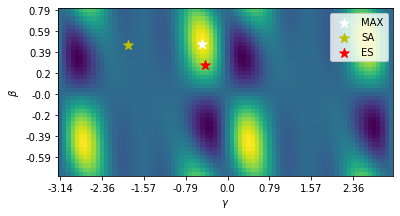

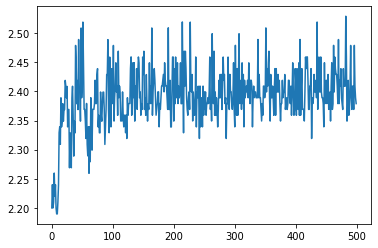

1.1095100991903804 -0.8091135915006749


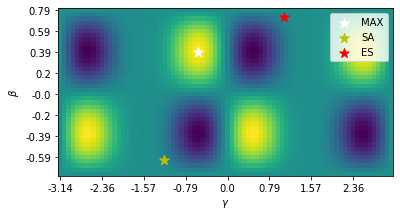

In [22]:
from classical_optimization.terra.utils import read_graph
import networkx as nx
import os
import matplotlib.pyplot as plt
path = '../../hari'
all_data = {}
qubit_numbers = []
for folder in os.listdir(path):
    num_qubits = int(folder.split('_')[0])
    qubit_numbers.append(num_qubits)
    for graph_file in os.listdir(os.path.join(path, folder)):
        print(graph_file)
        graph_data = read_graph(os.path.join(path, folder, graph_file))
        from networkx.algorithms.connectivity.cuts import minimum_edge_cut
        graph = graph_data['graph']
        extant_data = all_data.get(num_qubits, [])
        extant_data.append(graph_data)
        all_data[num_qubits] = extant_data
        import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    for num_qubits in qubit_numbers:
        print(f"NUMQUBITS: {num_qubits}")
        for graph_data in all_data[num_qubits]:
            if graph_data.get('es_result') is not None:
                plt.plot([res[1] for res in graph_data.get('es_result')[-1]])
            landscape = None
            for k in graph_data.keys():
                if 'landscape' in k and 'time' not in k:
                    _, disc, max_beta, max_gamma, min_beta, min_gamma = k.split('_')
                    disc = int(disc[1:])
                    max_beta = float(max_beta[1:])
                    min_beta = float(min_beta[1:])
                    max_gamma = float(max_gamma[1:])
                    min_gamma = float(min_gamma[1:])
                    landscape = graph_data[k]
                    if disc == 40:
                        break
            if landscape is not None:
                ind = np.argmax(landscape)
                ind = np.unravel_index(ind,landscape.shape)
                scatterpoints = [(ind, 'w', 'MAX')]
                skip = False
                for result, color, label in [('annealing_result', 'y', 'SA'), ('es_result', 'r', 'ES')]:
                    if graph_data.get(result) is not None:
                        gamma, beta = graph_data.get(result)[0]
                        plt.show()
                        y, x = ((beta - min_beta) % (max_beta-min_beta)) * (disc - 1) / (max_beta-min_beta), ((gamma - min_gamma) % (max_gamma - min_gamma)) * (2*disc-1)/(max_gamma-min_gamma)
                        scatterpoints.append(((disc - y, x), color, label))
                    else:
                        skip = True
                if skip:
                    continue
                plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints)  
                print(gamma, beta)
                plt.show()

In [23]:
from classical_optimization.terra.utils import read_graph
import networkx as nx
import os
import matplotlib.pyplot as plt
path = '../../harinoisy'
all_data = {}
qubit_numbers = []
for folder in os.listdir(path):
    num_qubits = int(folder.split('_')[0])
    qubit_numbers.append(num_qubits)
    for graph_file in os.listdir(os.path.join(path, folder)):
        print(graph_file)
        graph_data = read_graph(os.path.join(path, folder, graph_file))
        from networkx.algorithms.connectivity.cuts import minimum_edge_cut
        graph = graph_data['graph']
        extant_data = all_data.get(num_qubits, [])
        extant_data.append(graph_data)
        all_data[num_qubits] = extant_data
        import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    for num_qubits in qubit_numbers:
        print(f"NUMQUBITS: {num_qubits}")
        for graph_data in all_data[num_qubits]:
            if graph_data.get('es_result') is not None:
                plt.plot([res[1] for res in graph_data.get('es_result')[-1]])
            landscape = None
            for k in graph_data.keys():
                if 'landscape' in k and 'time' not in k:
                    _, disc, max_beta, max_gamma, min_beta, min_gamma = k.split('_')
                    disc = int(disc[1:])
                    max_beta = float(max_beta[1:])
                    min_beta = float(min_beta[1:])
                    max_gamma = float(max_gamma[1:])
                    min_gamma = float(min_gamma[1:])
                    landscape = graph_data[k]
                    if disc == 40:
                        break
            if landscape is not None:
                ind = np.argmax(landscape)
                ind = np.unravel_index(ind,landscape.shape)
                scatterpoints = [(ind, 'w', 'MAX')]
                skip = False
                for result, color, label in [('annealing_result', 'y', 'SA'), ('es_result', 'r', 'ES')]:
                    if graph_data.get(result) is not None:
                        gamma, beta = graph_data.get(result)[0]
                        plt.show()
                        y, x = ((beta - min_beta) % (max_beta-min_beta)) * (disc - 1) / (max_beta-min_beta), ((gamma - min_gamma) % (max_gamma - min_gamma)) * (2*disc-1)/(max_gamma-min_gamma)
                        scatterpoints.append(((disc - y, x), color, label))
                    else:
                        skip = True
                if skip:
                    continue
                plot_landscape(landscape, max_gamma, max_beta, min_gamma, min_beta, scatterpoints)  
                print(gamma, beta)
                plt.show()

445f0df1855dbcc2a0b5712bc7bebd4d.pkl
283f511e60c4cae3b50ab649dbe1ffe3.pkl
a8f0f08ed4c82e7b1e0406437d6c7874.pkl
b899f7ba525130c20ac9bd7d834b870a.pkl
86d083816d6af02bdb16442fcdacf5cf.pkl
144791a6e0350fef1f936a0f03c4b26e.pkl
dbdfce81c645c9b4635f31548144fc82.pkl
63849320b96a66270317d9f219f6a1b0.pkl
b0e82c0e2770ef7779f232e7d95efa97.pkl
933e9f92d158c27c342f2bddf8da260f.pkl
NUMQUBITS: 8


In [24]:
all_data

{8: [{'graph': <networkx.classes.graph.Graph at 0x7fedeec2a250>,
   'landscape_d40_b0.7853981633974483_g3.141592653589793_b-0.7853981633974483_g-3.141592653589793': array([[ 2.99239800e-17, -7.97972799e-17, -1.07552856e-16, ...,
            1.79543880e-16,  1.08420217e-16,  2.99239800e-17],
          [ 1.60461922e-17, -6.82775119e-02, -1.33764838e-01, ...,
            1.33764838e-01,  6.82775119e-02,  1.60461922e-17],
          [ 1.21430643e-16, -1.34786672e-01, -2.64065237e-01, ...,
            2.64065237e-01,  1.34786672e-01,  1.21430643e-16],
          ...,
          [-1.80411242e-16,  1.34786672e-01,  2.64065237e-01, ...,
           -2.64065237e-01, -1.34786672e-01, -1.80411242e-16],
          [-6.93889390e-18,  6.82775119e-02,  1.33764838e-01, ...,
           -1.33764838e-01, -6.82775119e-02, -6.93889390e-18],
          [ 2.64545330e-17,  1.18828558e-16,  4.68375339e-16, ...,
           -3.31332184e-16, -4.85722573e-17,  2.64545330e-17]]),
   'landscape_d40_b0.7853981633974483_g3.